Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2012-08-25 -686.475171 -2248.651319    55.684557  -686.475171  -686.475171   
1 2012-08-26 -678.372660 -2414.745142   -81.191464  -678.372660  -678.372660   
2 2012-08-27 -670.270149  -861.448009  1525.681679  -670.270149  -670.270149   
3 2012-08-28 -662.167638  -808.824393  1621.311746  -662.167638  -662.167638   
4 2012-08-29 -654.065127  -698.833517  1591.425993  -654.065127  -654.065127   

   additive_terms  additive_terms_lower  additive_terms_upper       weekly  \
0     -422.261377           -422.261377           -422.261377  -994.419741   
1     -580.221416           -580.221416           -580.221416 -1143.373026   
2     1008.530371           1008.530371           1008.530371   457.243392   
3     1145.292015           1145.292015           1145.292015   607.917190   
4     1078.743296           1078.743296           1078.743296   556.498961   

   weekly_lower  weekly_upper      yearly  yearly_

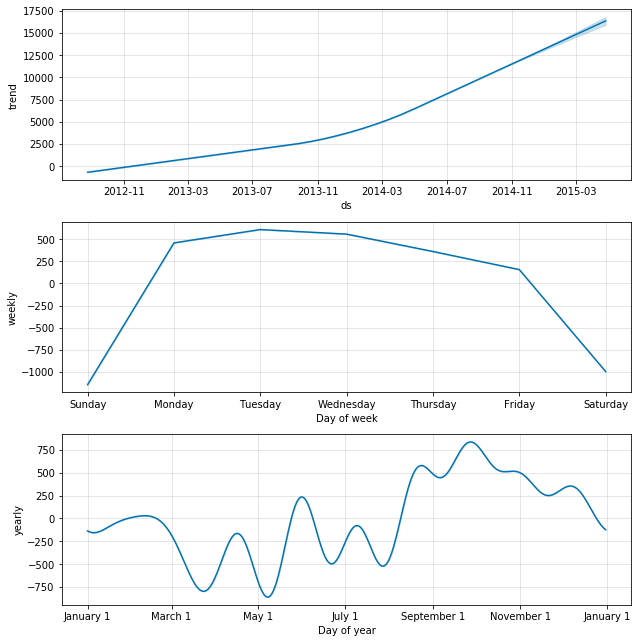

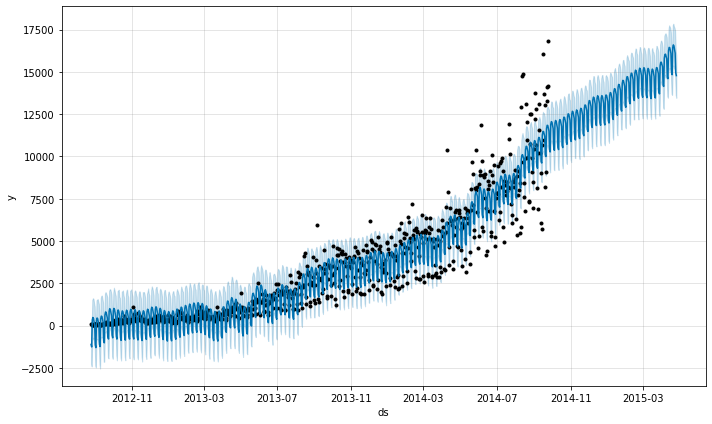

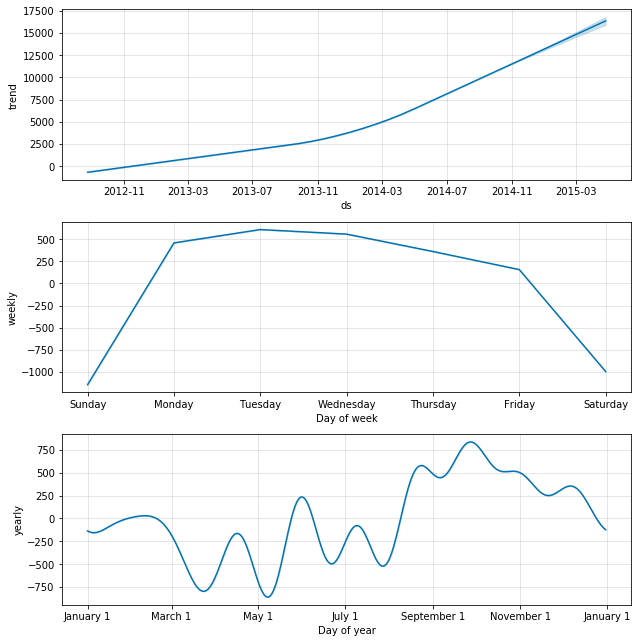

In [1]:
import pandas as pd

# 数据加载
train = pd.read_csv('./train.csv')
# print(train.head())
# 转化为pandas日期格式
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Datetime
train.drop(['ID', 'Datetime'], axis=1, inplace=True)
#print(train.head())
# 按照天进行采样
daily_train = train.resample('D').sum()
#print(daily_train.head())
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop('Count', axis=1, inplace=True)
#print(daily_train.head())

from fbprophet import Prophet
# 拟合prophet模型
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1) # 季节性组件的强度,值越小越抑制季节性波动。（默认10）
# 训练
model.fit(daily_train)
# 建立未来7个月（213天）数据框
future = model.make_future_dataframe(periods=213)
# 预测未来7个月走势
forecast = model.predict(future)
pd.options.display.max_columns=100
print(forecast.head())

# 画图输出
model.plot(forecast)
# 查看各个成分
model.plot_components(forecast)